In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from DNModel import model
import numpy as np
import random
from data import get_dataset
from time import time
import os
from train import train, test, Average
from argparse import Namespace

In [4]:
opts = Namespace(
    seed = 123,
    data_dir = '../',
    num_workers = 6,
    use_gpu = False,
    batch_size = 30,
    lr = 1e-4,
    epochs = 30,
    lr_decay_ep = 31,
    is_train = True,
    time_start = time()
)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'



print('Hello Here')
# set seed
np.random.seed(opts.seed)
random.seed(opts.seed)
torch.manual_seed(opts.seed)

# load dataset
print('[INFO] Begin to call get_dataset')
train_dataset, test_dataset = get_dataset(opts.data_dir)
print('[INFO] Begin to load train set')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=opts.batch_size, shuffle=True, num_workers=opts.num_workers, pin_memory=opts.use_gpu, drop_last=True)
print('[INFO] Begin to load test set')
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=opts.batch_size, shuffle=False, pin_memory=opts.use_gpu, drop_last=False)


optimizer = torch.optim.Adam(model.parameters(), lr=opts.lr)

this_epoch = -1
# train
if opts.is_train:

    auc_max = 0.0
    train_average = Average()
    print('[INFO] process starts')
    for epoch in range(opts.epochs):
        opts.epoch = epoch
        train(model, optimizer, train_loader, train_average, opts)

        if epoch < 10:
            continue

        # test
        auc = test(model, test_loader, opts)


        if auc > auc_max:
            auc_max = auc
            print('save model')
            this_epoch = epoch
            torch.save(model.state_dict(),'./dn201_gradcam.pt')
model.load_state_dict(torch.load('./dn201_gradcam.pt'))
test(model, test_loader, opts)

Hello Here
[INFO] Begin to call get_dataset
begin images
begin gc.
0th done.
1th done.
2th done.
3th done.
4th done.
5th done.
6th done.
7th done.
8th done.
9th done.
10th done.
11th done.
12th done.
13th done.
14th done.
15th done.
16th done.
17th done.
18th done.
19th done.
20th done.
21th done.
22th done.
23th done.
24th done.
25th done.
26th done.
27th done.
28th done.
29th done.
30th done.
31th done.
32th done.
33th done.
34th done.
35th done.
36th done.
37th done.
38th done.
39th done.
40th done.
41th done.
42th done.
43th done.
44th done.
45th done.
46th done.
47th done.
48th done.
49th done.
50th done.
51th done.
52th done.
53th done.
54th done.
55th done.
56th done.
57th done.
58th done.
59th done.
60th done.
61th done.
62th done.
63th done.
64th done.
65th done.
66th done.
67th done.
68th done.
69th done.
70th done.
71th done.
72th done.
73th done.
74th done.
75th done.
76th done.
77th done.
78th done.
79th done.
80th done.
81th done.
82th done.
83th done.
84th done.
85th don

0.9066690916341917

## best present you can give me in the early morning!

#  MODEL_EVALUATIONS

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [6]:
def test(model, test_loader):
    ps = []
    labels = []
    
    model.eval()
    for i, (image, label) in enumerate(test_loader):
        labels.append(label)
        with torch.no_grad():
            logit = model(image)
            p = torch.sigmoid(logit)
            ps.append(p.cpu())
    ps = torch.cat(ps, dim=0).numpy()
    labels = torch.cat(labels, dim=0).numpy()
    return (ps, labels)

ps, labels = test(model, test_loader)

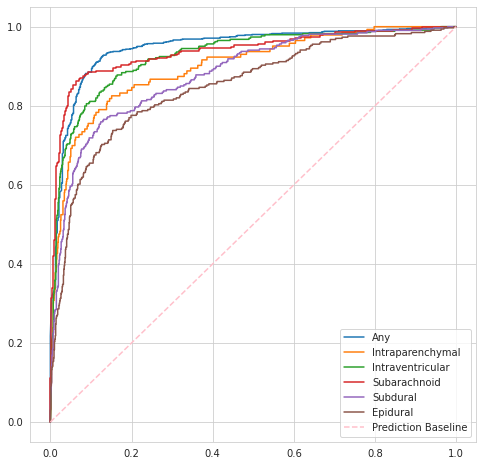

In [17]:
st = [
    'Any',
    'Intraparenchymal',
    'Intraventricular',
    'Subarachnoid',
    'Subdural',
    'Epidural'
]
rx = np.linspace(0,1,100)
ry = rx

plt.figure(figsize=(8,8))
for i in range(6):
    x, y, t = roc_curve(labels[:, i], ps[:, i])
    plt.plot(x,y, label=st[i])

plt.plot(rx,ry, linestyle='--', c='pink', label='Prediction Baseline')

plt.legend(loc='lower right')

In [11]:
import seaborn as sns

In [12]:
sns.set_style('whitegrid')